In [7]:
% pylab inline
import pybedtools
import pandas as pd
import seaborn as sns
sns.set_context('paper', font_scale=2)
sns.set_style('whitegrid')
from riboraptor.count import get_region_sizes


Populating the interactive namespace from numpy and matplotlib


In [20]:
hg_cds_bed = '/home/cmb-panasas2/skchoudh/genomes/hg38/annotation/gencode.v25.gffutils.cds.bed'
mm_cds_bed = '/home/cmb-panasas2/skchoudh/genomes/mm10/annotation/gencode.vM11.gffutils.cds.bed'
ce_cds_bed = '/home/cmb-panasas2/skchoudh/genomes/WBcel235/annotation/Caenorhabditis_elegans.WBcel235.91.gffutils.cds.bed'
z_cds_bed = '/home/cmb-panasas2/skchoudh/genomes/GRCz10/annotation/Danio_rerio.GRCz10.91.gffutils.cds.bed'
rn_cds_bed = '/home/cmb-panasas2/skchoudh/genomes/rn6/annotation/Rattus_norvegicus.Rnor_6.0.91.gffutils.cds.bed'
dmel_cds_bed = '/home/cmb-panasas2/skchoudh/genomes/drosophila_melanogaster_BDGP6/annotation/Drosophila_melanogaster.BDGP6.91.gffutils.cds.bed'
ecoli_cds_bed = '/home/cmb-panasas2/skchoudh/genomes/escherichia_coli_str_k_12_substr_mg1655/annotation/Escherichia_coli_str_k_12_substr_mg1655.ASM584v2.38.gffutils.cds.bed'

genomes = {'hg38' : hg_cds_bed, 
           'mm10' : mm_cds_bed, 
           'WBcel235' : ce_cds_bed, 
           'GRCz10' : z_cds_bed,
           'rn6' : rn_cds_bed, 
           'BDGP6' : dmel_cds_bed,
           'EColi_MG1655' : ecoli_cds_bed}

In [29]:
region_sizes = {}
for key, value in genomes.iteritems():
    region_sizes[key] = get_region_sizes(value)

In [30]:
region_sizes_df = []
for key, value in region_sizes.iteritems():
    region_sizes_df.append((key, np.mean(value.values()), np.median(value.values()), np.std(value.values())))
region_sizes_df = pd.DataFrame(region_sizes_df, columns= ['genome', 'mean_cds_length', 'median_cds_length', 'stddev_cds_length'])
region_sizes_df = region_sizes_df.set_index('genome')


In [31]:
region_sizes_df

,mean_cds_length,median_cds_length,stddev_cds_length
genome,,,
EColi_MG1655,950.731884,846.0,626.723205
BDGP6,1641.571921,1188.0,1965.628589
rn6,1556.412989,1116.0,1497.063878
WBcel235,1244.026605,993.0,1272.831754
hg38,1771.304086,1331.0,2015.284342
mm10,1616.977267,1164.0,1734.850965
GRCz10,1671.967030,1233.0,1780.472524


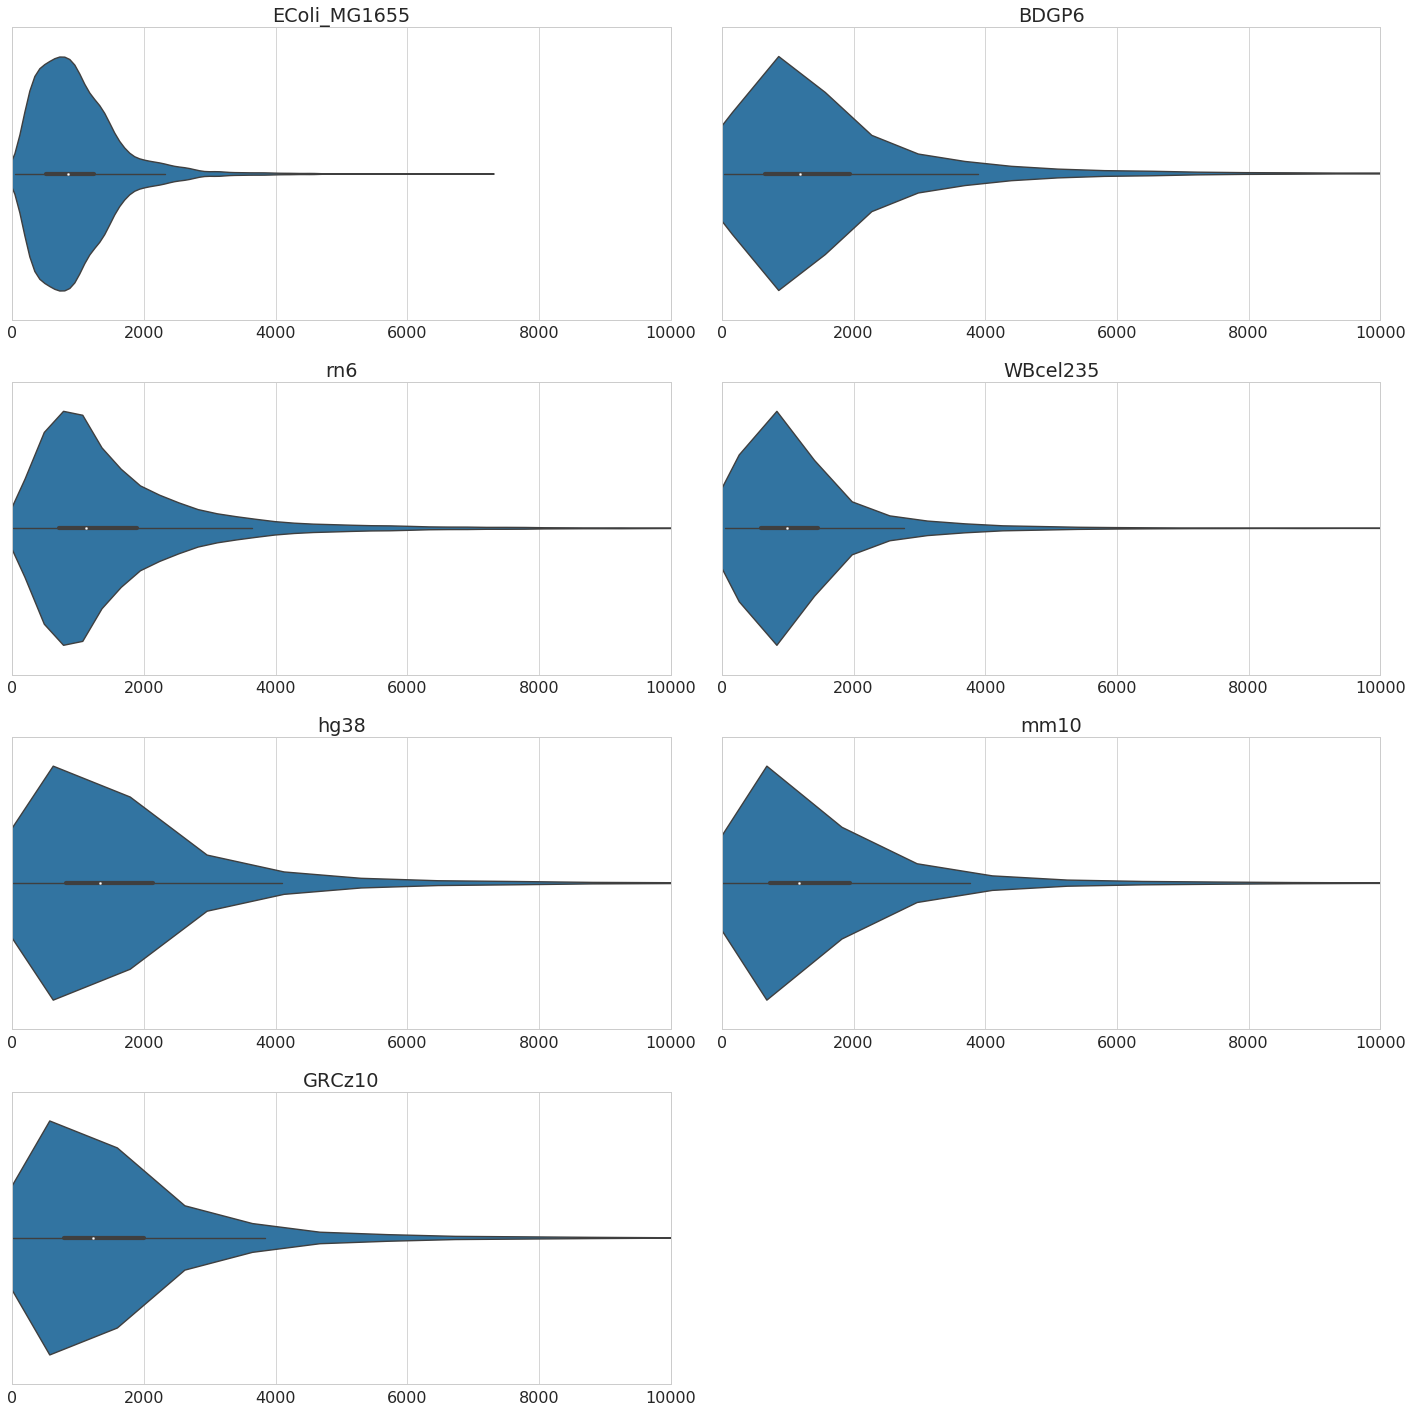

In [34]:
fig  = plt.figure(figsize=(20,20))
i = 1
for key, value in region_sizes.iteritems():
    ax = plt.subplot(4, 2, i)
    sns.violinplot(value.values(), ax=ax)
    ax.set(xlim=(0, 10000)) 
    ax.set_title(key)
    i+=1
fig.tight_layout()